# Some approximation features from computational math second lab

We'll need'em here as well

Check [it out](https://github.com/johnny-keker/computational-mathematics/tree/master/lab2)

In [1]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

# Labwork itself

0.1
phi(x) = -680.765x + 15.435


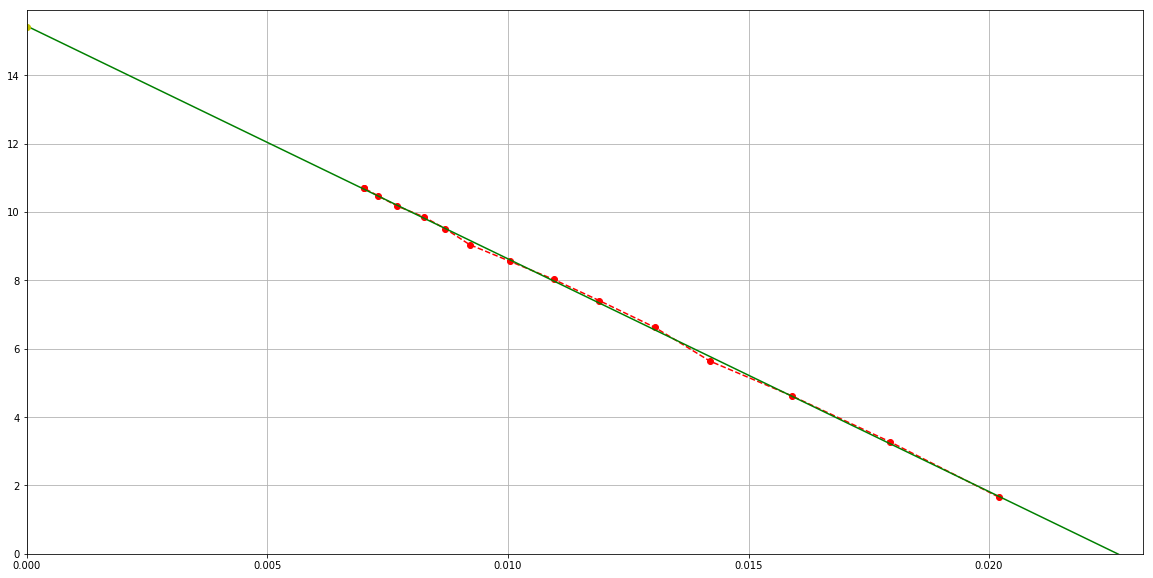

In [52]:
import numpy as np
import matplotlib.pyplot as plt

u1 = np.array([1.7, 3.2, 4.5, 5.6, 6.7, 7.4, 8.0, 8.5, 9.0, 9.5, 9.9, 10.18, 10.46, 10.7, 10.7])
u2 = np.array([1.62, 3.34, 4.74, 5.67, 6.55, 7.41, 8.05, 8.6, 9.09, 9.51, 9.81, 10.16, 10.48, 10.7, 10.7])
u_mean = [round((u1[i] + u2[i]) / 2, 5) for i in range(len(u1))]

i1 = np.array([0.02, 0.018, 0.016, 0.014, 0.013, 0.012, 0.011, 0.01, 0.009, 0.0087, 0.0082, 0.0077, 0.0073, 0.007, 0.007])
i2 = np.array([0.0204, 0.0179, 0.0158, 0.0144, 0.0131, 0.0118, 0.0109, 0.0101, 0.0094, 0.0087, 0.0083, 0.0077, 0.0073, 0.007, 0.007])
i_mean = [round((i1[i] + i2[i]) / 2, 5) for i in range(len(i1))]


linear_u_i = linear_approximation(i_mean, u_mean)
ys_linear_u_i = linear(i_mean, linear_u_i[0], linear_u_i[1])
square_delta_u_i = round(square_deviation(epsilon(u_mean, ys_linear_u_i)), 1)
print(square_delta_u_i)
print(f"phi(x) = {round(linear_u_i[0], 3)}x + {round(linear_u_i[1], 3)}")

epsilon_source = round(linear([0], linear_u_i[0], linear_u_i[1])[0], 1)
i_k = round(linear_u_i[1] / -linear_u_i[0], 4) 
inner_resistance = round(epsilon_source / i_k, 1)

p1 = np.array([round(i * epsilon_source - i**2 * inner_resistance, 5) for i in i_mean])
p2 = np.array([round(i**2 * inner_resistance, 5) for i in i_mean])
p = [round(np.sum([p1[i], p2[i]]), 5) for i in range(len(p1))]
kpd = [round(p1[i] / p[i], 5) for i in range(len(p))]
#print(f"{p1}\n\n{p2}\n\n{p}\n\n{kpd}")

plot_x = np.array(np.arange(0, i_k, step = 0.00001))

plt.figure(figsize=(20,10))
plt.plot(i_mean, u_mean, 'ro--',
         plot_x, linear(plot_x, linear_u_i[0], linear_u_i[1]), 'g',
         0.0, epsilon_source, 'yo')
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0, i_k + 0.0005, 0, epsilon_source + 0.5])
plt.grid()
plt.show()